# Basic Plots
In this notebook, we'll visualize the data using some basic plots to gain an understanding of the trends in the data.

In [1]:
import pandas as pd
import os
import numpy as np
%matplotlib inline

## Movies Data

In [2]:
movies_path = os.path.join(os.path.pardir, 'processed', 'movies_processed.dat')
movies_df = pd.read_csv(movies_path)

In [3]:
movies_df[:10]

,id,year,genres
0,1,1995,Animation|Children's|Comedy
1,2,1995,Adventure|Children's|Fantasy
2,3,1995,Comedy|Romance
3,4,1995,Comedy|Drama
4,5,1995,Comedy
5,6,1995,Action|Crime|Thriller
6,7,1995,Comedy|Romance
7,8,1995,Adventure|Children's
8,9,1995,Action
9,10,1995,Action|Adventure|Thriller


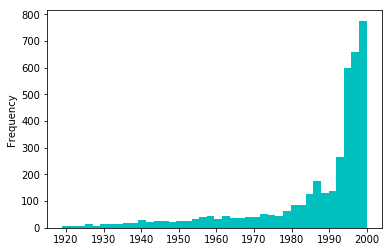

In [4]:
movies_df.year.plot(kind='hist', color='c', bins=40);

In [5]:
movies_df.year.unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1963,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921], dtype=int64)

In [6]:
movies_df.year.value_counts()[:10]

1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

250 seems to be a reasonable cutoff value for popularity.  

**Insight #1:** Thus, one of our first conclusions is that movies released between 1994 and 1999 are the most popular, among the entire population. We will later drill down to see whether this trend continues for various age groups, genders, and occupations.  

We will now find out the most popular genres.

In [7]:
split_genres = [row.split('|') for row in movies_df.genres]

In [8]:
split_genres

[['Animation', "Children's", 'Comedy'],
 ['Adventure', "Children's", 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', "Children's"],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Animation', "Children's"],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Drama', 'Thriller'],
 ['Drama', 'Romance'],
 ['Thriller'],
 ['Comedy'],
 ['Action'],
 ['Action', 'Comedy', 'Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Drama'],
 ['Romance'],
 ['Adventure', 'Sci-Fi'],
 ['Drama'],
 ['Drama'],
 ['Drama', 'Sci-Fi'],
 ['Adventure', 'Romance'],
 ["Children's", 'Comedy', 'Drama'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Documentary'],
 ['Comedy'],
 ['Comedy', 'Romance'],
 ['Drama'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Drama'],
 ['Action', 'Adventure'],
 ['Comedy'

In [9]:
concatenated_genres = np.concatenate(split_genres)
uniques, counts = np.unique(concatenated_genres, return_counts=True)

In [10]:
uniques

array(['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype='<U11')

In [11]:
counts

array([ 503,  283,  105,  251, 1200,  211,  127, 1603,   68,   44,  343,
        114,  106,  471,  276,  492,  143,   68], dtype=int64)

In [12]:
genre_counts = [(uniques[i], counts[i]) for i in range(len(uniques))]

In [13]:
genre_counts.sort(key=lambda x: x[1], reverse=True)

In [14]:
genre_counts

[('Drama', 1603),
 ('Comedy', 1200),
 ('Action', 503),
 ('Thriller', 492),
 ('Romance', 471),
 ('Horror', 343),
 ('Adventure', 283),
 ('Sci-Fi', 276),
 ("Children's", 251),
 ('Crime', 211),
 ('War', 143),
 ('Documentary', 127),
 ('Musical', 114),
 ('Mystery', 106),
 ('Animation', 105),
 ('Fantasy', 68),
 ('Western', 68),
 ('Film-Noir', 44)]

**Insight #2:** We thus conclude that *Drama* and *Comedy* are twice as popular as any other genre. *Action*, *Thriller*, and *Romance* are some other popular genres. Also, *Film-Noir*, *Western*, and *Fantasy* movies are the most unpopular.

## Users Data

In [15]:
users_file = os.path.join(os.path.pardir, 'processed', 'users_processed.dat')
users_df = pd.read_csv(users_file, sep='::', engine='python')

In [16]:
users_df[:10]

,id,gender,age_group,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


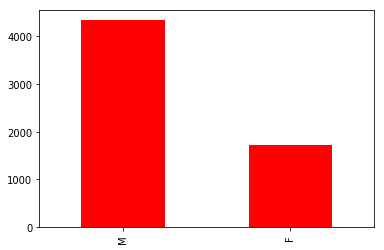

In [17]:
users_df.gender.value_counts().plot(kind='bar', color='r');

**Insight #3:** We have data for about twice as many male people as female people. This suggests that we should perform gender-based analysis, rather than combining all the data together.

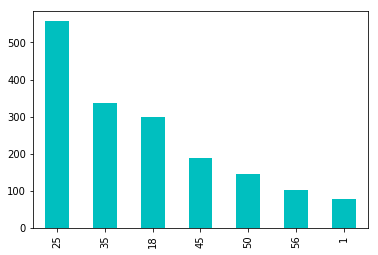

In [18]:
users_df[users_df.gender == 'F'].age_group.value_counts().plot(kind='bar', color='c');

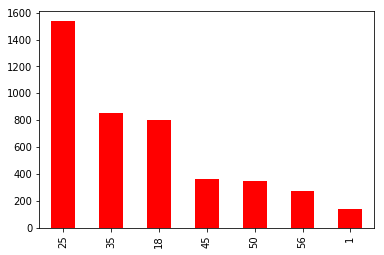

In [36]:
users_df[users_df.gender == 'M'].age_group.value_counts().plot(kind='bar', color='r');

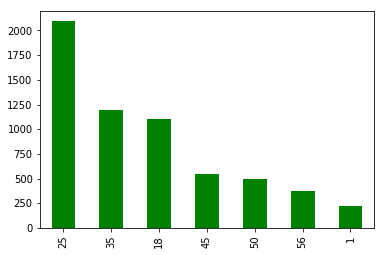

In [38]:
users_df.age_group.value_counts().plot(kind='bar', color='g');

**Insight #4:** Even though there are many more males than females, the distribution of the age groups of each gender is surprisingly similar. This distribution is also consistent with the overall population distribution.

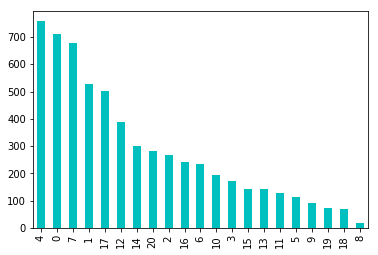

In [39]:
users_df.occupation.value_counts().plot(kind='bar', color='c');

**Insight #5:** A sizeable percentage of the population has refused to divulge occupation information, or is 'other'. Among the occupations we do know about, it seems students and executives are the biggest consumers, followed by academics and engineers/technicians.

In [20]:
import zipcode

In [22]:
def get_state(zip_code):
    try:
        this_zip = zipcode.isequal(str(zip_code))
        return this_zip.state
    except:
        return 'XX'

In [23]:
users_df = users_df.assign(state = [get_state(x) for x in users_df['zip_code']])

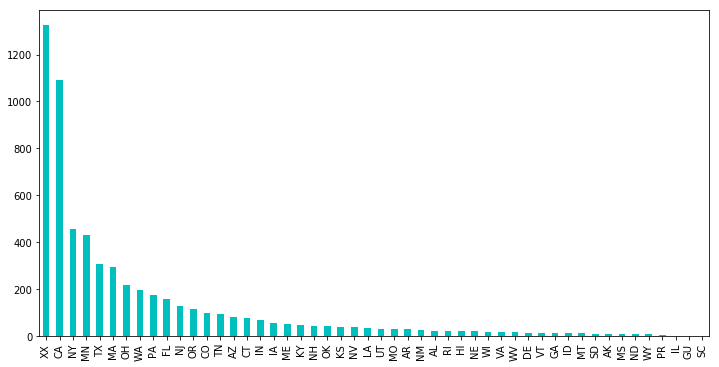

In [24]:
users_df.state.value_counts().plot(kind='bar', color='c', figsize=(12, 6));

**Insight #6:** Most users have not revealed their demographic information reliably, but among the ones that did, most users are from California. There is a significant gap between the number of Californian residents and the number of people in the next most active state, New York.